In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/datasets/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.fit_transform(x_valid)
x_test_scaled = scaler.fit_transform(x_test)

In [10]:
# 函数式API 功能API
input = keras.layers.Input(shape=x_train.shape[1:]) # 读取数据
hidden1 = keras.layers.Dense(30, activation='relu')(input) # (input)之前的可以看作是一个函数，input 是这个函数的输入参数
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
# 复合函数形式：f(x) = h(g(x))

concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)

# 函数式API 写法需要用 keras.models.Model() 固化模型
model = keras.models.Model(inputs = [input], outputs = [output])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd")
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_8[0][0]              

In [11]:
history = model.fit(x_train_scaled, y_train, validation_data=(x_valid_scaled, y_valid),
                    epochs=100, callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 54us/sample - loss: 1.1399 - val_loss: 6.8811
Epoch 2/100
11610/11610 [==============================] - 0s 34us/sample - loss: 17.0862 - val_loss: 215.4339
Epoch 3/100
11610/11610 [==============================] - 0s 35us/sample - loss: nan - val_loss: nan       
Epoch 4/100
11610/11610 [==============================] - 0s 34us/sample - loss: nan - val_loss: nan
Epoch 5/100
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan
Epoch 6/100
11610/11610 [==============================] - 0s 33us/sample - loss: nan - val_loss: nan


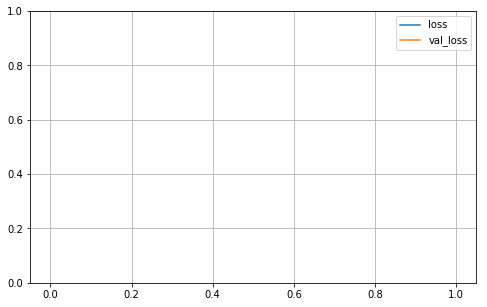

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [13]:
model.evaluate(x_test_scaled, y_test)

5160/5160 [==============================] - 0s 17us/sample - loss: nan


nan